<a href="https://colab.research.google.com/github/OvinduWijethunge/Machine_Learning_Projects/blob/version-1/youtube%20spam%20classifier/KNN%20model%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df = pd.read_csv('model.csv')
url = 'https://raw.githubusercontent.com/OvinduWijethunge/Machine_Learning_Projects/master/youtube%20spam%20classifier/models.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,sim_content,sim_comment,word_count,duplicate_word_ratio,length_of_comment,stop_word_ratio,post_coment_gap,black_word_count,comment_duplication,is_spam,no_of_sentences_2,no_of_sentences_3,num_of_punctuations_1.0,num_of_punctuations_2.0,num_of_punctuations_3.0,num_of_punctuations_4.0,num_of_punctuations_5.0,num_of_punctuations_6.0,is_period_sequence_1,is_link_1,is_youtube_link_1,is_number_1
0,0,-1.038590,-0.870409,1.866549,0.0000,4.274240,0.000000,13.337643,0.222222,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-1.103307,-0.971247,1.866549,0.0000,4.555200,0.111111,29.017218,0.000000,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,2,-1.064844,-0.957045,2.260334,0.0625,5.086086,0.062500,29.017218,0.125000,0.0,1,0,1,0,0,0,1,0,0,0,1,1,0
3,3,-0.936203,-0.910982,1.683387,0.0000,3.982309,0.142857,29.017218,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,-1.212501,-1.085031,2.122197,0.0000,4.920915,0.000000,29.017218,0.076923,0.0,1,1,0,0,0,0,1,0,0,1,1,1,0


In [5]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'length_of_comment', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'comment_duplication', 'is_spam',
       'no_of_sentences_2', 'no_of_sentences_3', 'num_of_punctuations_1.0',
       'num_of_punctuations_2.0', 'num_of_punctuations_3.0',
       'num_of_punctuations_4.0', 'num_of_punctuations_5.0',
       'num_of_punctuations_6.0', 'is_period_sequence_1', 'is_link_1',
       'is_youtube_link_1', 'is_number_1'],
      dtype='object')

In [6]:
dfc = df.copy()

In [7]:
y = dfc['is_spam']
X = dfc.drop(['is_spam','id'],axis=1)

### Handle imbalance dataset

In [8]:
dfc['is_spam'].value_counts()

0    6255
1     712
Name: is_spam, dtype: int64

In [9]:
from imblearn.combine import SMOTETomek
from collections import Counter

os=SMOTETomek(1)
X_os,y_os=os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_os)))

X = X_os
y = y_os

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 6255, 1: 712})
The number of classes after fit Counter({0: 6204, 1: 6204})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

### Hyperparameter Tuning

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [13]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [14]:
grid = {
   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [int(x) for x in range(1,70,2)],
 
    'n_neighbors': [int(x) for x in range(5,80)],
    'p': [1,2],
    'weights':['uniform', 'distance']
}

In [15]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True) 

In [16]:
from sklearn.model_selection import RandomizedSearchCV
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=grid, n_jobs=-1,n_iter = 75, cv=cv, scoring='accuracy',error_score=0,return_train_score=True,verbose=2)

In [17]:
knn_random.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 26.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=75, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
          

### Evaluvate

In [18]:
knn_random.best_score_

0.9594696748739213

In [19]:
knn_random.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 25,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [20]:
best_model = knn_random.best_estimator_

In [21]:
best_model

KNeighborsClassifier(algorithm='kd_tree', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [22]:
y_pred = best_model.predict(X_test)

In [23]:
err = (y_pred - y_test)

In [24]:
#err.value_counts().plot(kind='bar',color='yellow')

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.04297609454740801
MSE: 0.04297609454740801
RMSE: 0.20730676435516524


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1762  118]
 [  42 1801]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1880
           1       0.94      0.98      0.96      1843

    accuracy                           0.96      3723
   macro avg       0.96      0.96      0.96      3723
weighted avg       0.96      0.96      0.96      3723



In [27]:
# for save the model if you want
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model_v2.pkl', 'wb')
# dump information to that file
#pickle.dump(rf_random, file)

In [28]:
# Best score 0.9143196528569003

### ROC

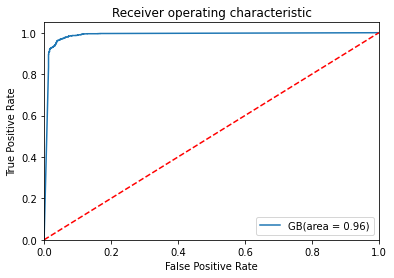

In [29]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**Recall - presicion with threshold values**

(0.0, 1.0)

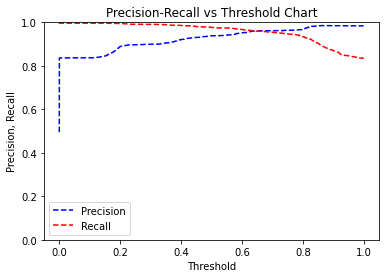

In [30]:
### Predict test_y values and probabilities based on random forest model
probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [31]:
import pickle
#open a file, where you ant to store the data
file = open('knn_Classifier.pkl', 'wb')
# dump information to that file
pickle.dump(best_model, file)

# New Section

# New Section

# New Section